In [108]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import re 

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 예측
# Decision tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor
# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
# Support Vector Machine (예측)
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#평가함수 (분류)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#로지스틱 회귀분석
from statsmodels.api import Logit
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Support Vector Machine (분류)
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
#모델 평가
from sklearn.metrics import f1_score, roc_curve, auc

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [109]:
df_raw = pd.read_csv("C:\\Users\\Sewon Lee\\Desktop\\big_data\\SCALE불량.csv", engine = "python")

# 데이터 전처리

In [110]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
PLATE_NO             720 non-null object
ROLLING_DATE         720 non-null object
SCALE                720 non-null object
SPEC                 720 non-null object
STEEL_KIND           720 non-null object
PT_THK               720 non-null float64
PT_WDTH              720 non-null int64
PT_LTH               720 non-null int64
PT_WGT               720 non-null int64
FUR_NO               720 non-null object
FUR_NO_ROW           720 non-null int64
FUR_HZ_TEMP          720 non-null int64
FUR_HZ_TIME          720 non-null int64
FUR_SZ_TEMP          720 non-null int64
FUR_SZ_TIME          720 non-null int64
FUR_TIME             720 non-null int64
FUR_EXTEMP           720 non-null int64
ROLLING_TEMP_T5      720 non-null int64
HSB                  720 non-null object
ROLLING_DESCALING    720 non-null int64
WORK_GR              720 non-null object
dtypes: float64(1), int64(12), object(8)
memo

In [111]:
df_raw.isnull().sum(axis=0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [86]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols : 
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

PLATE_NO : 720
ROLLING_DATE : 704
SCALE : 2
SPEC : 66
STEEL_KIND : 9
FUR_NO : 3
HSB : 2
WORK_GR : 4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202A01EB588>,
      dtype=object)

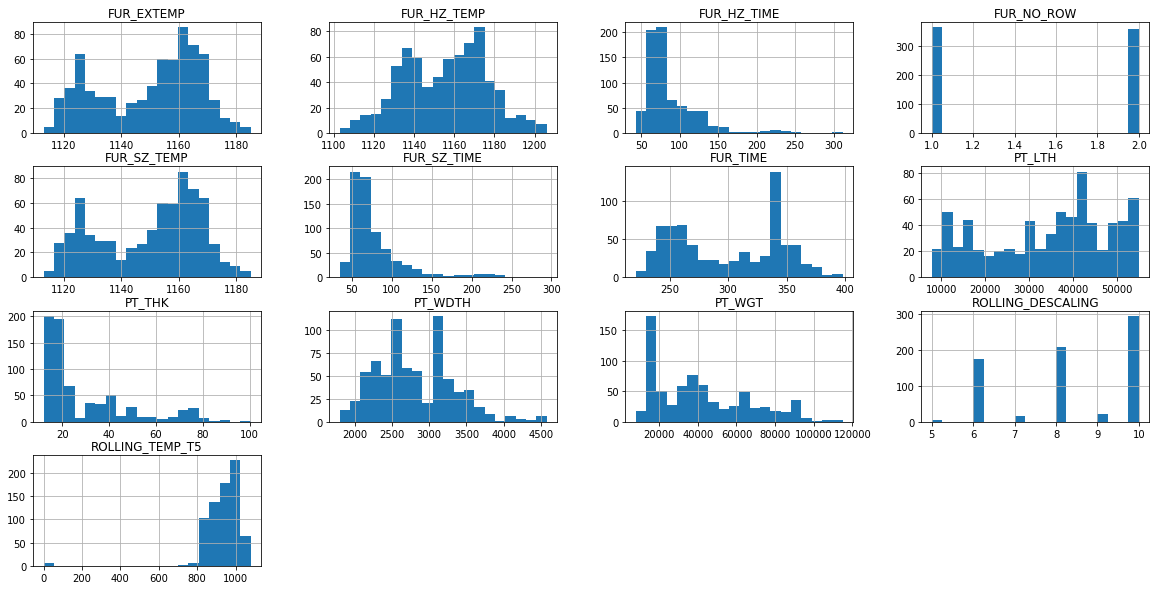

In [87]:
df_raw.hist(figsize=(20,10), bins=20)

### 스케일 변수 변환

In [119]:
df_raw["SCALE"] = np.where(df_raw['SCALE'] == "불량",1,0)
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


### 에치에스비 변환

In [120]:
df_raw["HSB"] = np.where(df_raw['HSB'] == "적용",1,0)
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,1,8,2조
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,1,8,2조
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,1,8,3조
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,1,8,3조
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,1,8,1조


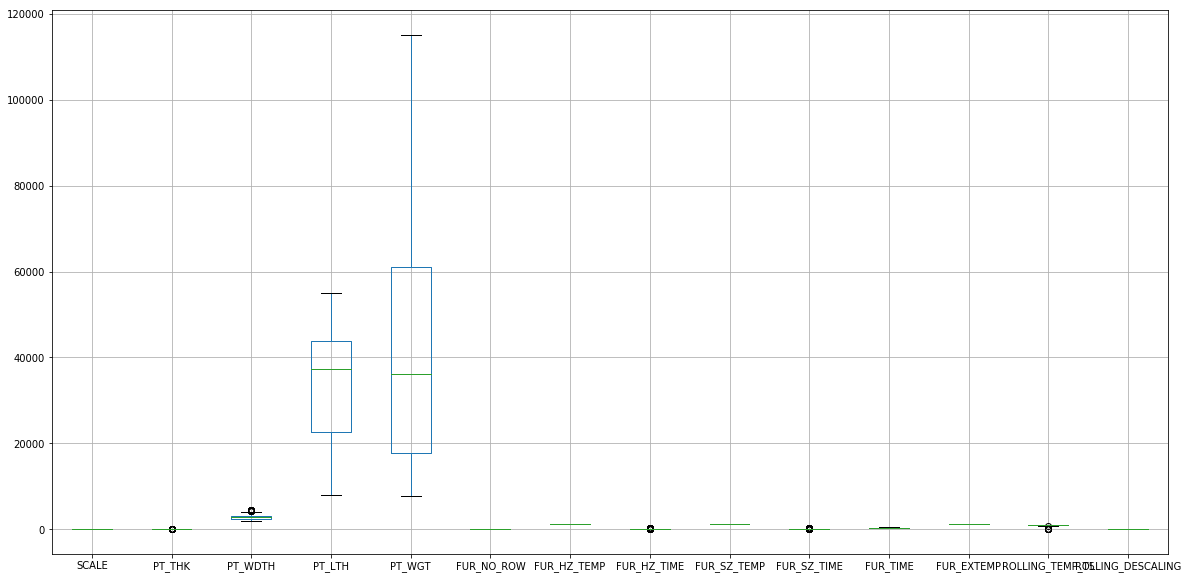

In [92]:
df_raw.boxplot(figsize = (20, 10))

### 롤링 디스케일링 변환

In [112]:
pd.crosstab(df_raw['ROLLING_DESCALING'], df_raw['SCALE'])

SCALE,불량,양품
ROLLING_DESCALING,,
5,5,0
6,26,150
7,15,0
8,99,109
9,20,0
10,66,230


In [121]:
pd.crosstab(df_raw['HSB'], df_raw['SCALE'])

SCALE,0,1
HSB,,
0,0,33
1,489,198


In [128]:
df_raw.groupby(['SCALE']).mean().round(2)

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
SCALE,,,,,,,,,,,,,,
0,30.91,2880.40,33368.98,37763.19,1.51,1151.79,87.08,1145.14,84.81,302.10,1145.14,905.40,1.00,8.33
1,25.79,2652.01,36343.39,49353.59,1.48,1162.85,91.60,1159.24,66.09,297.32,1159.24,994.29,0.86,8.30


In [141]:
df1 = df_raw['ROLLING_DESCALING'][df_raw['SCALE'] == 0]
df2 = df_raw['ROLLING_DESCALING'][df_raw['SCALE'] == 1]
 
#perform t-test assuming equal variances
tTestResult = stats.ttest_ind(df1, df2)
 
#perform t-test NOT assuming equal variances
tTestResultDiffVar = stats.ttest_ind(df1, df2, equal_var=False)
 
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is 0.186 and 0.852.
The t-statistic and p-value not assuming equal variances is 0.203 and 0.839


In [142]:
df_raw.groupby(['SCALE','ROLLING_DESCALING'])['SCALE'].count()

SCALE  ROLLING_DESCALING
0      6                    150
       8                    109
       10                   230
1      5                      5
       6                     26
       7                     15
       8                     99
       9                     20
       10                    66
Name: SCALE, dtype: int64

In [19]:
df_raw["ROLLING_DESCALING_GR"] = np.where(df_raw['ROLLING_DESCALING'] == 5,0,np.where(df_raw['ROLLING_DESCALING'] == 7,0,np.where(df_raw['ROLLING_DESCALING'] == 9,0,df_raw['ROLLING_DESCALING'])))
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,ROLLING_DESCALING_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1133,934,1,8,2조,8
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,122,1135,53,283,1135,937,1,8,2조,8
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,116,1121,55,282,1121,889,1,8,3조,8
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,125,1127,68,316,1127,885,1,8,3조,8
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,134,1128,48,314,1128,873,1,8,1조,8


In [20]:
pd.crosstab(df_raw['ROLLING_DESCALING_GR'], df_raw['SCALE'])

SCALE,0,1
ROLLING_DESCALING_GR,,
0,0,40
6,150,26
8,109,99
10,230,66


In [21]:
df_raw['ROLLING_DESCALING_GR'] = df_raw['ROLLING_DESCALING_GR'].astype(str)

In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 22 columns):
PLATE_NO                720 non-null object
ROLLING_DATE            720 non-null object
SCALE                   720 non-null int32
SPEC                    720 non-null object
STEEL_KIND              720 non-null object
PT_THK                  720 non-null float64
PT_WDTH                 720 non-null int64
PT_LTH                  720 non-null int64
PT_WGT                  720 non-null int64
FUR_NO                  720 non-null object
FUR_NO_ROW              720 non-null int64
FUR_HZ_TEMP             720 non-null int64
FUR_HZ_TIME             720 non-null int64
FUR_SZ_TEMP             720 non-null int64
FUR_SZ_TIME             720 non-null int64
FUR_TIME                720 non-null int64
FUR_EXTEMP              720 non-null int64
ROLLING_TEMP_T5         720 non-null int64
HSB                     720 non-null int32
ROLLING_DESCALING       720 non-null int64
WORK_GR                 720 

### 스펙 그룹화 처리

In [23]:
df_raw['SPEC_GR'] = df_raw['SPEC'].apply(lambda e: e.split("-")[0])
df_raw['SPEC_GR']

0      AB/EH32
1      AB/EH32
2           NV
3           NV
4           BV
5           BV
6           BV
7           BV
8           BV
9       COMMON
10      COMMON
11      COMMON
12      COMMON
13      COMMON
14          GL
15          GL
16          GL
17          GL
18          GL
19          GL
20          BV
21          GL
22          GL
23          GL
24          GL
25          GL
26      COMMON
27      COMMON
28      COMMON
29      COMMON
        ...   
690         NK
691         LR
692         NV
693         NK
694         NK
695         NK
696         GL
697         LR
698         NV
699         LR
700         LR
701         GL
702         LR
703         LR
704         LR
705         LR
706         NV
707         NV
708         NV
709         LR
710         LR
711         LR
712         LR
713         NV
714         LR
715         NK
716         NV
717         NV
718         LR
719         GL
Name: SPEC_GR, Length: 720, dtype: object

In [24]:
df_raw['SPEC_GR'] = df_raw['SPEC'].str[:2]

In [25]:
pd.crosstab(df_raw['SPEC_GR'], df_raw['SCALE'])

SCALE,0,1
SPEC_GR,,
A1,0,1
A2,1,5
A5,1,1
A7,1,0
AB,28,9
AP,2,0
BV,72,14
CC,0,1
CO,26,2


In [96]:
pd.crosstab(df_raw['FUR_NO'], df_raw['SCALE'])

SCALE,0,1
FUR_NO,,
1호기,167,73
2호기,167,70
3호기,155,88


In [98]:
pd.crosstab(df_raw['HSB'], df_raw['SCALE'])

SCALE,0,1
HSB,,
미적용,0,33
적용,489,198


In [99]:
pd.crosstab(df_raw['WORK_GR'], df_raw['SCALE'])

SCALE,0,1
WORK_GR,,
1조,122,67
2조,120,45
3조,118,54
4조,129,65


In [26]:
df_raw.ix[df_raw.SPEC_GR == "A1", "SPEC_GR"] = "A"
df_raw.ix[df_raw.SPEC_GR == "A2", "SPEC_GR"] = "A"
df_raw.ix[df_raw.SPEC_GR == "A5", "SPEC_GR"] = "A"
df_raw.ix[df_raw.SPEC_GR == "A7", "SPEC_GR"] = "A"
df_raw.ix[df_raw.SPEC_GR == "V4", "SPEC_GR"] = "OTHER"
df_raw.ix[df_raw.SPEC_GR == "AP", "SPEC_GR"] = "OTHER"
df_raw.ix[df_raw.SPEC_GR == "CC", "SPEC_GR"] = "OTHER"
pd.crosstab(df_raw['SPEC_GR'], df_raw['SCALE'])

SCALE,0,1
SPEC_GR,,
A,3,7
AB,28,9
BV,72,14
CO,26,2
GL,49,7
JS,60,86
KR,13,18
KS,12,16
LR,77,28


In [27]:
df_raw.ix[df_raw.ROLLING_TEMP_T5 == 0, "ROLLING_TEMP_T5"] = df_raw['ROLLING_TEMP_T5'].mean()

In [28]:
df_raw["SCALE"].sum()

231

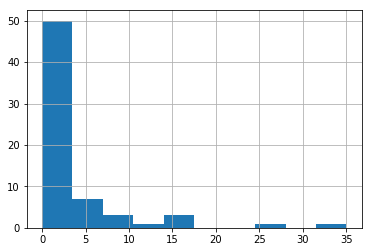

In [29]:
df_raw.groupby("SPEC")["SCALE"].agg("sum").hist()

In [30]:
df_raw.groupby("SPEC")["SCALE"].agg("sum")

SPEC
A131-DH36TM     1
A283-C          5
A516-60         1
A709-36         0
AB/A            4
AB/AH32         1
AB/B            3
AB/EH32-TM      0
AB/EH36-TM      1
API-2W-50T      0
BV-A            0
BV-AH32         5
BV-AH32-TM      0
BV-AH36-TL      1
BV-AH36-TM      1
BV-B            6
BV-EH32-TM      0
BV-EH36-TM      1
CCS-B           1
COMMON          2
GL-A            1
GL-A32          1
GL-A32-TM       1
GL-A36-TM       0
GL-D36-TM       2
GL-E32-TM       1
GL-E36-TM       1
JS-SM400A       2
JS-SM400B       3
JS-SM490A      25
               ..
KS-HSB500       0
KS-HSB600       0
KS-SM400A       3
KS-SM400B       2
KS-SM490A       5
KS-SM490B       3
KS-SS400        3
LR-A           11
LR-AH32        10
LR-AH36         0
LR-AH36-TM      0
LR-B            6
LR-EH32-TM      1
LR-EH36-TM      0
NK-KA           2
NK-KA32         1
NK-KA32-TM      0
NK-KD36-TM      0
NV-A           14
NV-A32          9
NV-A32-TM       1
NV-A36-TM       0
NV-B            2
NV-D32-TM       0
NV-D3

In [31]:
df_raw.groupby("STEEL_KIND")["SCALE"].agg("sum")

STEEL_KIND
C0    212
C1      1
C3      1
T0      2
T1      2
T3      0
T5      2
T7      6
T8      5
Name: SCALE, dtype: int32

In [32]:
df_raw_x = df_raw[["SPEC","STEEL_KIND","PT_THK","PT_WDTH","PT_LTH","PT_WGT","FUR_NO","FUR_NO_ROW","FUR_HZ_TEMP","FUR_HZ_TIME","FUR_SZ_TEMP","FUR_SZ_TIME","FUR_TIME","FUR_EXTEMP"
                  ,"ROLLING_TEMP_T5","HSB","ROLLING_DESCALING","WORK_GR","ROLLING_DESCALING_GR","SPEC_GR"]]

In [33]:
df_raw_x2 = df_raw[["SPEC","STEEL_KIND","PT_THK","PT_WDTH","FUR_NO","FUR_NO_ROW","FUR_HZ_TEMP","FUR_HZ_TIME","FUR_SZ_TEMP","FUR_SZ_TIME","FUR_TIME","FUR_EXTEMP"
                  ,"ROLLING_TEMP_T5","HSB","ROLLING_DESCALING","WORK_GR","ROLLING_DESCALING_GR","SPEC_GR"]]

In [34]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 23 columns):
PLATE_NO                720 non-null object
ROLLING_DATE            720 non-null object
SCALE                   720 non-null int32
SPEC                    720 non-null object
STEEL_KIND              720 non-null object
PT_THK                  720 non-null float64
PT_WDTH                 720 non-null int64
PT_LTH                  720 non-null int64
PT_WGT                  720 non-null int64
FUR_NO                  720 non-null object
FUR_NO_ROW              720 non-null int64
FUR_HZ_TEMP             720 non-null int64
FUR_HZ_TIME             720 non-null int64
FUR_SZ_TEMP             720 non-null int64
FUR_SZ_TIME             720 non-null int64
FUR_TIME                720 non-null int64
FUR_EXTEMP              720 non-null int64
ROLLING_TEMP_T5         720 non-null float64
HSB                     720 non-null int32
ROLLING_DESCALING       720 non-null int64
WORK_GR                 72

In [35]:
df_raw_pre = df_raw.drop(["PLATE_NO","SPEC","ROLLING_DATE","ROLLING_DESCALING"] , axis = 1, inplace =False)
df_raw_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
SCALE                   720 non-null int32
STEEL_KIND              720 non-null object
PT_THK                  720 non-null float64
PT_WDTH                 720 non-null int64
PT_LTH                  720 non-null int64
PT_WGT                  720 non-null int64
FUR_NO                  720 non-null object
FUR_NO_ROW              720 non-null int64
FUR_HZ_TEMP             720 non-null int64
FUR_HZ_TIME             720 non-null int64
FUR_SZ_TEMP             720 non-null int64
FUR_SZ_TIME             720 non-null int64
FUR_TIME                720 non-null int64
FUR_EXTEMP              720 non-null int64
ROLLING_TEMP_T5         720 non-null float64
HSB                     720 non-null int32
WORK_GR                 720 non-null object
ROLLING_DESCALING_GR    720 non-null object
SPEC_GR                 720 non-null object
dtypes: float64(2), int32(2), int64(10), object(5)
memory usage: 101.

In [36]:
obj_cols = df_raw_pre.select_dtypes("object").columns
for col in obj_cols : 
    _n = len(df_raw_pre[col].value_counts())
    print(col, ":", str(_n))

STEEL_KIND : 9
FUR_NO : 3
WORK_GR : 4
ROLLING_DESCALING_GR : 4
SPEC_GR : 14


In [58]:
df_raw_pre = df_raw_pre[df_raw_pre["HSB"] == 1]
df_raw_pre

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,WORK_GR,ROLLING_DESCALING_GR,SPEC_GR
0,0,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934.0,1,2조,8,AB
1,0,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937.0,1,2조,8,AB
2,0,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889.0,1,3조,8,NV
3,0,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885.0,1,3조,8,NV
4,0,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873.0,1,1조,8,BV
5,0,T8,38.33,3098,13334,12430,3호기,2,1143,127,1128,57,314,1128,874.0,1,4조,8,BV
6,0,T8,38.33,3099,16719,15590,1호기,1,1138,126,1130,50,289,1130,878.0,1,2조,8,BV
7,0,T8,38.33,3099,16719,15590,1호기,2,1139,126,1131,52,294,1131,870.0,1,4조,8,BV
8,0,T8,38.33,3099,16719,15590,2호기,1,1127,126,1122,52,293,1122,873.0,1,1조,8,BV
9,0,T8,38.43,3129,16187,15280,2호기,2,1135,119,1124,73,298,1124,881.0,1,4조,8,CO


In [61]:
df_raw_dummy = pd.get_dummies(df_raw_pre)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,SPEC_GR_GL,SPEC_GR_JS,SPEC_GR_KR,SPEC_GR_KS,SPEC_GR_LR,SPEC_GR_NK,SPEC_GR_NV,SPEC_GR_OTHER,SPEC_GR_PI,SPEC_GR_SA
0,0,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,0,0,0,0,0,0,0,0,0
1,0,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,0,0,0,0,0,0,0,0,0
2,0,33.27,3619,19181,18130,1,1129,116,1121,55,...,0,0,0,0,0,0,1,0,0,0
3,0,33.27,3619,19181,18130,2,1152,125,1127,68,...,0,0,0,0,0,0,1,0,0,0
4,0,38.33,3098,13334,12430,1,1140,134,1128,48,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df_raw_dummy = df_raw_dummy.drop(['ROLLING_DESCALING_GR_0'], axis=1)

In [66]:
df_raw_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 719
Data columns (total 47 columns):
SCALE                      687 non-null int32
PT_THK                     687 non-null float64
PT_WDTH                    687 non-null int64
PT_LTH                     687 non-null int64
PT_WGT                     687 non-null int64
FUR_NO_ROW                 687 non-null int64
FUR_HZ_TEMP                687 non-null int64
FUR_HZ_TIME                687 non-null int64
FUR_SZ_TEMP                687 non-null int64
FUR_SZ_TIME                687 non-null int64
FUR_TIME                   687 non-null int64
FUR_EXTEMP                 687 non-null int64
ROLLING_TEMP_T5            687 non-null float64
HSB                        687 non-null int32
STEEL_KIND_C0              687 non-null uint8
STEEL_KIND_C1              687 non-null uint8
STEEL_KIND_C3              687 non-null uint8
STEEL_KIND_T0              687 non-null uint8
STEEL_KIND_T1              687 non-null uint8
STEEL_KIND_T3    

In [116]:
df_raw_dummy.corr(method = "spearman").round(3)

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,SPEC_GR_GL,SPEC_GR_JS,SPEC_GR_KR,SPEC_GR_KS,SPEC_GR_LR,SPEC_GR_NK,SPEC_GR_NV,SPEC_GR_OTHER,SPEC_GR_PI,SPEC_GR_SA
SCALE,1.000,0.027,-0.278,0.050,0.263,-0.032,0.234,0.051,0.357,-0.276,...,-0.156,0.331,0.131,0.129,-0.067,-0.068,-0.062,-0.025,-0.154,0.062
PT_THK,0.027,1.000,-0.376,-0.869,-0.256,-0.022,-0.494,0.261,-0.591,0.252,...,0.169,-0.090,-0.021,0.010,-0.270,-0.158,-0.206,0.041,0.338,-0.015
PT_WDTH,-0.278,-0.376,1.000,0.175,0.021,0.007,0.168,-0.168,0.223,-0.082,...,-0.096,-0.200,-0.028,-0.105,0.258,0.038,0.179,-0.100,-0.253,-0.065
PT_LTH,0.050,-0.869,0.175,1.000,0.421,-0.004,0.449,-0.195,0.552,-0.225,...,-0.151,0.098,0.122,0.042,0.224,0.160,0.202,-0.007,-0.308,-0.015
PT_WGT,0.263,-0.256,0.021,0.421,1.000,-0.015,0.174,-0.065,0.345,-0.246,...,-0.061,0.436,0.119,0.085,-0.104,0.006,-0.190,0.057,-0.206,0.196
FUR_NO_ROW,-0.032,-0.022,0.007,-0.004,-0.015,1.000,0.014,-0.021,0.024,0.086,...,-0.014,0.016,0.002,-0.072,0.012,-0.007,0.021,0.001,0.002,-0.016
FUR_HZ_TEMP,0.234,-0.494,0.168,0.449,0.174,0.014,1.000,-0.111,0.803,-0.340,...,-0.133,-0.034,0.030,-0.013,0.158,0.147,0.160,0.026,-0.140,0.146
FUR_HZ_TIME,0.051,0.261,-0.168,-0.195,-0.065,-0.021,-0.111,1.000,-0.277,0.098,...,0.027,0.012,0.007,0.031,-0.088,-0.077,-0.086,0.001,0.302,-0.098
FUR_SZ_TEMP,0.357,-0.591,0.223,0.552,0.345,0.024,0.803,-0.277,1.000,-0.551,...,-0.260,0.142,0.062,0.049,0.181,0.092,0.137,0.022,-0.329,0.139
FUR_SZ_TIME,-0.276,0.252,-0.082,-0.225,-0.246,0.086,-0.340,0.098,-0.551,1.000,...,0.184,-0.123,-0.046,-0.068,-0.092,-0.030,-0.015,-0.019,0.153,-0.085


In [67]:
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace =False)
df_raw_y = df_raw_dummy["SCALE"]

In [68]:
df_raw_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 719
Data columns (total 46 columns):
PT_THK                     687 non-null float64
PT_WDTH                    687 non-null int64
PT_LTH                     687 non-null int64
PT_WGT                     687 non-null int64
FUR_NO_ROW                 687 non-null int64
FUR_HZ_TEMP                687 non-null int64
FUR_HZ_TIME                687 non-null int64
FUR_SZ_TEMP                687 non-null int64
FUR_SZ_TIME                687 non-null int64
FUR_TIME                   687 non-null int64
FUR_EXTEMP                 687 non-null int64
ROLLING_TEMP_T5            687 non-null float64
HSB                        687 non-null int32
STEEL_KIND_C0              687 non-null uint8
STEEL_KIND_C1              687 non-null uint8
STEEL_KIND_C3              687 non-null uint8
STEEL_KIND_T0              687 non-null uint8
STEEL_KIND_T1              687 non-null uint8
STEEL_KIND_T3              687 non-null uint8
STEEL_KIND_T5    

## MODELING

In [69]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state=1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y, test_size = (0.3/0.7), random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (274, 46)
train data Y size : (274,)
test data X size : (207, 46)
test data Y size : (207,)
validation data X size : (206, 46)
validation data Y size : (206,)


In [70]:
model = ["DecisionTree","RandomForest","GradientBoosting", "KNN"]

train_accuracy = [] ; test_accuracy= [] ; val_accuracy= [] 
model_f1_score = []
model_auc = []

In [71]:
dt_model = DecisionTreeClassifier()
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
val_accuracy.append(dt_model.score(df_val_x, df_val_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))

In [72]:
rf_model = RandomForestClassifier()
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
val_accuracy.append(rf_model.score(df_val_x, df_val_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))

In [73]:
gb_model = GradientBoostingClassifier()
gb_model.fit(df_train_x, df_train_y)

train_accuracy.append(gb_model.score(df_train_x, df_train_y))
val_accuracy.append(gb_model.score(df_val_x, df_val_y))
test_accuracy.append(gb_model.score(df_test_x, df_test_y))

y_pred = gb_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))

In [74]:
knn_model = KNeighborsClassifier()
knn_model.fit(df_train_x, df_train_y)

train_accuracy.append(knn_model.score(df_train_x, df_train_y))
val_accuracy.append(knn_model.score(df_val_x, df_val_y))
test_accuracy.append(knn_model.score(df_test_x, df_test_y))

y_pred = knn_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))

In [75]:
df_eval = pd.DataFrame(index=model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["ValAccuracy"] = val_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval["F1Score"] = model_f1_score
df_eval["AUC"] = model_auc
df_eval.round(3)

,TrainAccuracy,ValAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,1.000,0.995,0.995,0.992,0.992
RandomForest,0.993,0.961,0.947,0.908,0.915
GradientBoosting,1.000,0.981,0.966,0.943,0.946
KNN,0.850,0.728,0.734,0.586,0.698


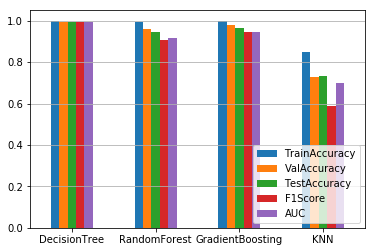

In [76]:
df_eval.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.grid(axis = "y")

In [77]:
v_feature_name = df_train_x.columns

export_graphviz(dt_model, out_file = "tree_final.dot", class_names=["Good", "Bad"]
               ,feature_names=v_feature_name,impurity=True, filled=True)

with open("tree_final.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [78]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['Importance'] = dt_model.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.659
10,FUR_EXTEMP,0.177
31,ROLLING_DESCALING_GR_8,0.063
0,PT_THK,0.062
9,FUR_TIME,0.016
8,FUR_SZ_TIME,0.016
29,ROLLING_DESCALING_GR_10,0.005
30,ROLLING_DESCALING_GR_6,0.004
35,SPEC_GR_CO,0.000
27,WORK_GR_3조,0.000


Text(0, 0.5, '변수')

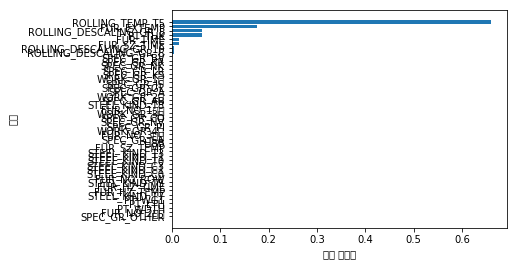

In [81]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")